In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.visible_device_list='2'
config.gpu_options.per_process_gpu_memory_fraction = 0.25
set_session(tf.Session(config=config))

## x : 50000개 dataset with feature = 12 
## y :  0~9 10개 중 임의의 값 출력
import numpy as np

# 데이터셋 생성
x_train = np.random.random((50000, 12))
y_train = np.random.randint(10, size=(50000, 1))
x_test = np.random.random((5000, 12))
y_test = np.random.randint(10, size=(5000, 1))

/etc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_color = y_train.reshape(50000,)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

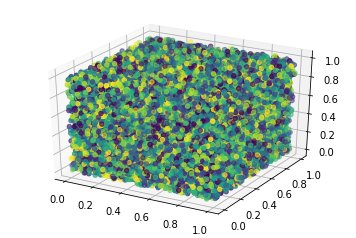

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 데이터셋 확인 (3차원)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
plot_color = y_train.reshape(50000,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

In [3]:
# one-hot encoding for setting the probability values per class
from keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [21]:
#2. 모델 구성하기 - single layer
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=12))
model.add(Activation('softmax'))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

Epoch 1/1000
50000/50000 [==============================] - 3s 65us/step - loss: 2.3358 - acc: 0.1025
Epoch 2/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3202 - acc: 0.1030
Epoch 3/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3125 - acc: 0.1025
Epoch 4/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3082 - acc: 0.1046
Epoch 5/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3057 - acc: 0.1045
Epoch 6/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3043 - acc: 0.1036
Epoch 7/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3035 - acc: 0.1052
Epoch 8/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3030 - acc: 0.1058
Epoch 9/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3027 - acc: 0.1053
Epoch 10/1000
50000/50000 [==============================] - 3s 59us/step - loss: 

50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1049
Epoch 160/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1053
Epoch 161/1000
50000/50000 [==============================] - 3s 55us/step - loss: 2.3024 - acc: 0.1051
Epoch 162/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1044
Epoch 163/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1055
Epoch 164/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1052
Epoch 165/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3023 - acc: 0.1057
Epoch 166/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3024 - acc: 0.1042
Epoch 167/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3023 - acc: 0.1047
Epoch 168/1000
50000/50000 [==============================] - 3s 60us/step - lo

50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1053
Epoch 316/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1053
Epoch 317/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1071
Epoch 318/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3024 - acc: 0.1046
Epoch 319/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3024 - acc: 0.1058
Epoch 320/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1058
Epoch 321/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3023 - acc: 0.1039
Epoch 322/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3023 - acc: 0.1058
Epoch 323/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3024 - acc: 0.1040
Epoch 324/1000
50000/50000 [==============================] - 3s 59us/step - lo

50000/50000 [==============================] - 3s 60us/step - loss: 2.3024 - acc: 0.1052
Epoch 472/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3024 - acc: 0.1069
Epoch 473/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3024 - acc: 0.1030
Epoch 474/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.3024 - acc: 0.1046
Epoch 475/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3022 - acc: 0.1051
Epoch 476/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3023 - acc: 0.1047
Epoch 477/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3024 - acc: 0.1049
Epoch 478/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1069
Epoch 479/1000
50000/50000 [==============================] - 3s 60us/step - loss: 2.3024 - acc: 0.1052
Epoch 480/1000
50000/50000 [==============================] - 3s 61us/step - lo

50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1054
Epoch 628/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1060
Epoch 629/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3023 - acc: 0.1065
Epoch 630/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3023 - acc: 0.1055
Epoch 631/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3022 - acc: 0.1065
Epoch 632/1000
50000/50000 [==============================] - 3s 61us/step - loss: 2.3024 - acc: 0.1052
Epoch 633/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3024 - acc: 0.1055
Epoch 634/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3023 - acc: 0.1062
Epoch 635/1000
50000/50000 [==============================] - 3s 62us/step - loss: 2.3023 - acc: 0.1057
Epoch 636/1000
50000/50000 [==============================] - 3s 61us/step - lo

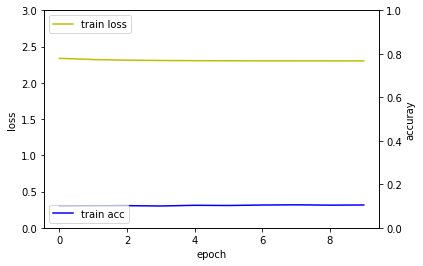

5000/5000 [==============================] - 0s 71us/step
loss_and_metrics : [2.304585654449463, 0.1046]


In [7]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# 2. 모델 구성하기 - 2 layer perceptron model
model = Sequential()
model.add(Dense(64, input_dim=12))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)

Epoch 1/1000
50000/50000 [==============================] - 4s 77us/step - loss: 2.3067 - acc: 0.1005
Epoch 2/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.3036 - acc: 0.1019
Epoch 3/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.1044
Epoch 4/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.3023 - acc: 0.1061
Epoch 5/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.3019 - acc: 0.1069
Epoch 6/1000
50000/50000 [==============================] - 4s 70us/step - loss: 2.3014 - acc: 0.1091
Epoch 7/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.3012 - acc: 0.1070
Epoch 8/1000
50000/50000 [==============================] - 3s 70us/step - loss: 2.3009 - acc: 0.1097
Epoch 9/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.3007 - acc: 0.1093
Epoch 10/1000
50000/50000 [==============================] - 4s 71us/step - loss: 

50000/50000 [==============================] - 3s 68us/step - loss: 2.2907 - acc: 0.1238
Epoch 81/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.2907 - acc: 0.1261
Epoch 82/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.2906 - acc: 0.1250
Epoch 83/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2906 - acc: 0.1263
Epoch 84/1000
50000/50000 [==============================] - 3s 67us/step - loss: 2.2908 - acc: 0.1272
Epoch 85/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.2900 - acc: 0.1265
Epoch 86/1000
50000/50000 [==============================] - 3s 70us/step - loss: 2.2905 - acc: 0.1250
Epoch 87/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.2903 - acc: 0.1244
Epoch 88/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.2901 - acc: 0.1284
Epoch 89/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.290

50000/50000 [==============================] - 4s 70us/step - loss: 2.2882 - acc: 0.1278
Epoch 160/1000
50000/50000 [==============================] - 3s 70us/step - loss: 2.2881 - acc: 0.1278
Epoch 161/1000
50000/50000 [==============================] - 3s 70us/step - loss: 2.2881 - acc: 0.1277
Epoch 162/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2879 - acc: 0.1290
Epoch 163/1000
50000/50000 [==============================] - 3s 68us/step - loss: 2.2881 - acc: 0.1305
Epoch 164/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2880 - acc: 0.1293
Epoch 165/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2878 - acc: 0.1289
Epoch 166/1000
50000/50000 [==============================] - 3s 70us/step - loss: 2.2877 - acc: 0.1296
Epoch 167/1000
50000/50000 [==============================] - 4s 70us/step - loss: 2.2877 - acc: 0.1302
Epoch 168/1000
50000/50000 [==============================] - 3s 70us/step - lo

50000/50000 [==============================] - 4s 75us/step - loss: 2.2873 - acc: 0.1299
Epoch 238/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2873 - acc: 0.1296
Epoch 239/1000
50000/50000 [==============================] - 4s 74us/step - loss: 2.2874 - acc: 0.1278
Epoch 240/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2871 - acc: 0.1316
Epoch 241/1000
50000/50000 [==============================] - 4s 70us/step - loss: 2.2871 - acc: 0.1292
Epoch 242/1000
50000/50000 [==============================] - 4s 73us/step - loss: 2.2873 - acc: 0.1277
Epoch 243/1000
50000/50000 [==============================] - 4s 70us/step - loss: 2.2873 - acc: 0.1287
Epoch 244/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2872 - acc: 0.1285
Epoch 245/1000
50000/50000 [==============================] - 4s 74us/step - loss: 2.2871 - acc: 0.1280
Epoch 246/1000
50000/50000 [==============================] - 4s 74us/step - lo

50000/50000 [==============================] - 3s 70us/step - loss: 2.2869 - acc: 0.1307
Epoch 316/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2868 - acc: 0.1324
Epoch 317/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2868 - acc: 0.1294
Epoch 318/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2867 - acc: 0.1315
Epoch 319/1000
50000/50000 [==============================] - 4s 70us/step - loss: 2.2870 - acc: 0.1289
Epoch 320/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2870 - acc: 0.1308
Epoch 321/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2869 - acc: 0.1311
Epoch 322/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2866 - acc: 0.1282
Epoch 323/1000
50000/50000 [==============================] - 4s 73us/step - loss: 2.2867 - acc: 0.1306
Epoch 324/1000
50000/50000 [==============================] - 4s 72us/step - lo

50000/50000 [==============================] - 4s 71us/step - loss: 2.2864 - acc: 0.1300
Epoch 394/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2866 - acc: 0.1296
Epoch 395/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2868 - acc: 0.1301
Epoch 396/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2865 - acc: 0.1303
Epoch 397/1000
50000/50000 [==============================] - 4s 75us/step - loss: 2.2864 - acc: 0.1294
Epoch 398/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2866 - acc: 0.1293
Epoch 399/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2866 - acc: 0.1294
Epoch 400/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2865 - acc: 0.1285
Epoch 401/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2867 - acc: 0.1286
Epoch 402/1000
50000/50000 [==============================] - 4s 70us/step - lo

50000/50000 [==============================] - 4s 72us/step - loss: 2.2867 - acc: 0.1305
Epoch 472/1000
50000/50000 [==============================] - 4s 73us/step - loss: 2.2866 - acc: 0.1298
Epoch 473/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2866 - acc: 0.1303
Epoch 474/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2867 - acc: 0.1312
Epoch 475/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2866 - acc: 0.1311
Epoch 476/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2867 - acc: 0.1302
Epoch 477/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2868 - acc: 0.1296
Epoch 478/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2868 - acc: 0.1297
Epoch 479/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2868 - acc: 0.1309
Epoch 480/1000
50000/50000 [==============================] - 4s 73us/step - lo

50000/50000 [==============================] - 4s 71us/step - loss: 2.2868 - acc: 0.1309
Epoch 550/1000
50000/50000 [==============================] - 3s 70us/step - loss: 2.2868 - acc: 0.1290
Epoch 551/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2869 - acc: 0.1302
Epoch 552/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2868 - acc: 0.1316
Epoch 553/1000
50000/50000 [==============================] - 3s 69us/step - loss: 2.2866 - acc: 0.1315
Epoch 554/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2866 - acc: 0.1314
Epoch 555/1000
50000/50000 [==============================] - 4s 71us/step - loss: 2.2866 - acc: 0.1308
Epoch 556/1000
50000/50000 [==============================] - 4s 70us/step - loss: 2.2868 - acc: 0.1293
Epoch 557/1000
50000/50000 [==============================] - 4s 72us/step - loss: 2.2867 - acc: 0.1303
Epoch 558/1000
50000/50000 [==============================] - 4s 71us/step - lo

KeyboardInterrupt: 

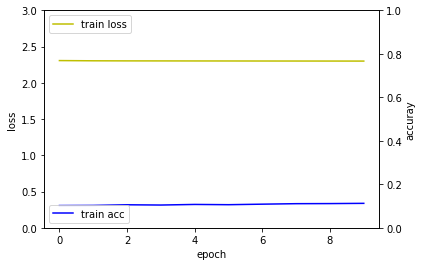

5000/5000 [==============================] - 0s 66us/step
loss_and_metrics : [2.305387816619873, 0.1082]


In [10]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation


# 2. 모델 구성하기 
model = Sequential()
model.add(Dense(64, input_dim=12))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                832       
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 5,642
Trainable params: 5,642
Non-trainable params: 0
_________________________________________________________________


In [15]:


# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
50000/50000 [==============================] - 4s 84us/step - loss: 2.3053 - acc: 0.0988
Epoch 2/100
50000/50000 [==============================] - 4s 74us/step - loss: 2.3030 - acc: 0.1037
Epoch 3/100
50000/50000 [==============================] - 4s 75us/step - loss: 2.3021 - acc: 0.1061
Epoch 4/100
50000/50000 [==============================] - 4s 74us/step - loss: 2.3016 - acc: 0.1057
Epoch 5/100
50000/50000 [==============================] - 4s 75us/step - loss: 2.3008 - acc: 0.1095
Epoch 6/100
50000/50000 [==============================] - 4s 75us/step - loss: 2.3003 - acc: 0.1112
Epoch 7/100
50000/50000 [==============================] - 4s 74us/step - loss: 2.2993 - acc: 0.1126
Epoch 8/100
50000/50000 [==============================] - 4s 74us/step - loss: 2.2986 - acc: 0.1146
Epoch 9/100
50000/50000 [==============================] - 4s 76us/step - loss: 2.2978 - acc: 0.1149
Epoch 10/100
50000/50000 [==============================] - 4s 76us/step - loss: 2.2971 - a

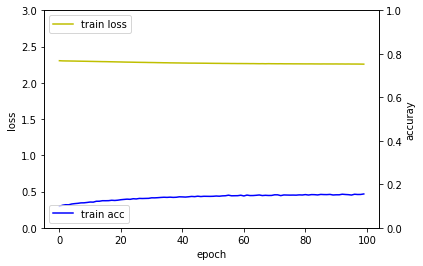

5000/5000 [==============================] - 0s 74us/step
loss_and_metrics : [2.3621770610809327, 0.1024]


In [16]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))